In [7]:
import requests
import json
from pprint import pprint
from config import api_key
import matplotlib.pyplot as plt

In [8]:
# Imports for calculations
import pandas as pd
import numpy as np

In [9]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
merged_data_df = pd.read_csv("Output/merged_data.csv")

# Display sample data
merged_data_df.head()

,Unnamed: 0,ori,agency_name,agency_id,state_name,state_abbr,division_name,region_name,region_desc,county_name,agency_type_name,nibrs,nibrs_start_date,latitude,longitude,data_year,offense,cleared,actual
0,0,NC0010000,Alamance County Sheriff's Office,10873,North Carolina,NC,South Atlantic,South,Region III,ALAMANCE,County,True,2019-01-01T00:00:00.000Z,36.041974,-79.399935,2013,violent-crime,84,109
1,1,NC0010000,Alamance County Sheriff's Office,10873,North Carolina,NC,South Atlantic,South,Region III,ALAMANCE,County,True,2019-01-01T00:00:00.000Z,36.041974,-79.399935,2014,violent-crime,81,123
2,2,NC0010000,Alamance County Sheriff's Office,10873,North Carolina,NC,South Atlantic,South,Region III,ALAMANCE,County,True,2019-01-01T00:00:00.000Z,36.041974,-79.399935,2015,violent-crime,97,114
3,3,NC0010000,Alamance County Sheriff's Office,10873,North Carolina,NC,South Atlantic,South,Region III,ALAMANCE,County,True,2019-01-01T00:00:00.000Z,36.041974,-79.399935,2016,violent-crime,77,95
4,4,NC0010000,Alamance County Sheriff's Office,10873,North Carolina,NC,South Atlantic,South,Region III,ALAMANCE,County,True,2019-01-01T00:00:00.000Z,36.041974,-79.399935,2017,violent-crime,34,46


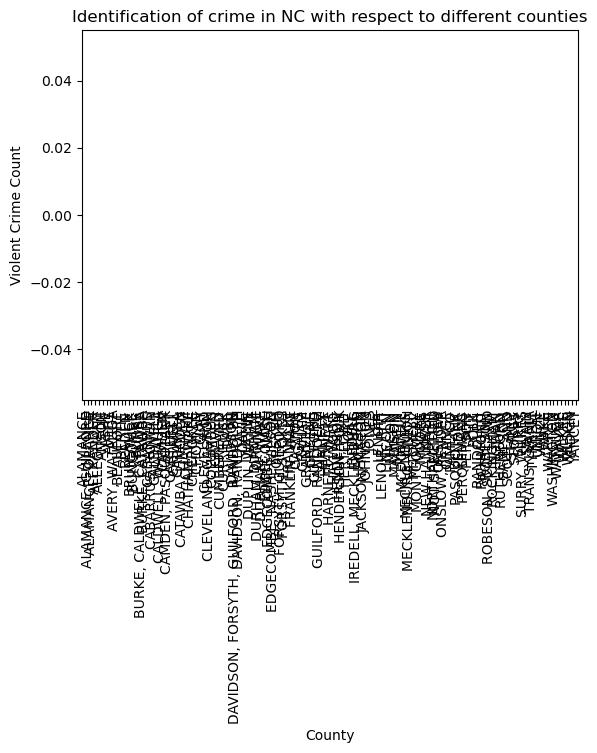

In [11]:
#Find the sum of violent crime for each county
merged_data_df['offense'] = pd.to_numeric(merged_data_df['offense'], errors='coerce')
county_crime_data = merged_data_df.groupby('county_name')['offense'].sum()

#Plotting the data
county_crime_data.plot(kind='bar', color='b'),
plt.xlabel('County')
plt.ylabel('Violent Crime Count')
plt.title('Identification of crime in NC with respect to different counties')
plt.savefig("Output/Fig1.png")
plt.show()

In [ ]:
#Pie chart for total number of crimes in NC(actual vs cleared)
total_actual_crime = merged_data_df['actual'].sum()
total_cleared_crime = merged_data_df['cleared'].sum()

#Plotting a pie chart
labels = ['Actual_crime', 'Cleared_crime']
sizes = [total_actual_crime, total_cleared_crime]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Total number of crimes in NC(actual vs cleared)")
plt.savefig("Output/Fig2.png")
plt.show()